画函数图像、画几何图形 结合小学生的数学教育。

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 1000)
y = s

NameError: name 'sqrt' is not defined

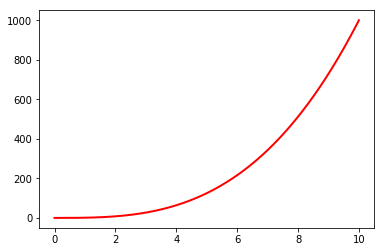

In [2]:
plt.plot(x,y,'r',linewidth=2)